## Feedforward NN classifier

This example demonstrate basic work with tensorflow.keras models, how to build simple feed-forward NN classifier and use it to classify Raman spectra

In [1]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Read the sample dataset. It contains four classes of Raman spectra. Class label is available in the last column.

In [2]:
data = pd.read_csv("../spectra.csv.gz").values
features = data[:,:-1] # take everything but last column
labels = data[:,-1] # take last column

Encode labels in one-hot encoding

In [3]:
labels_oh = to_categorical(labels)

Split the dataset into training and validation (here named test for brevity) subsets.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(features, labels_oh, test_size=0.3)

Plot couple of spectra to check that no error occured.

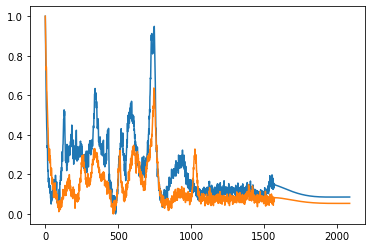

In [5]:
plt.plot(x_train[0])
plt.plot(x_test[0])


Now define important constants

In [6]:
inp_dim = x_train.shape[1]
out_dim = y_train.shape[1]

And define the model. Module tensorflow.keras provides a convinent way for model definition by passing output of one layer as input to another.

In [7]:
inp = Input(shape=(inp_dim,))
l = Dense(50, activation="relu")(inp)
l = Dense(25, activation="relu")(l)
out = Dense(out_dim, activation="softmax")(l)

Now create the classifier model, and compile it using crossentropy loss and adam optimizer.

In [8]:
classifier = Model(inp, out)
classifier.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
classifier.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2090)]            0         
_________________________________________________________________
dense (Dense)                (None, 50)                104550    
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 104       
Total params: 105,929
Trainable params: 105,929
Non-trainable params: 0
_________________________________________________________________


Now when we have training and validation datasets and model, we can start training.

In [9]:
train_history = classifier.fit(x=x_train, y=y_train, batch_size=64, epochs=20, validation_data=[x_test, y_test])

Train on 971 samples, validate on 417 samples
Epoch 1/20
971/971 [==============================] - 0s 400us/sample - loss: 1.0583 - accuracy: 0.6334 - val_loss: 0.6525 - val_accuracy: 0.9400
Epoch 2/20
971/971 [==============================] - 0s 42us/sample - loss: 0.4689 - accuracy: 0.9846 - val_loss: 0.2610 - val_accuracy: 0.9904
Epoch 3/20
971/971 [==============================] - 0s 42us/sample - loss: 0.1714 - accuracy: 0.9990 - val_loss: 0.1075 - val_accuracy: 0.9928
Epoch 4/20
971/971 [==============================] - 0s 42us/sample - loss: 0.0736 - accuracy: 0.9990 - val_loss: 0.0598 - val_accuracy: 0.9904
Epoch 5/20
971/971 [==============================] - 0s 43us/sample - loss: 0.0404 - accuracy: 0.9990 - val_loss: 0.0400 - val_accuracy: 0.9904
Epoch 6/20
971/971 [==============================] - 0s 43us/sample - loss: 0.0278 - accuracy: 0.9979 - val_loss: 0.0315 - val_accuracy: 0.9904
Epoch 7/20
971/971 [==============================] - 0s 43us/sample - loss: 0.0194

Model fastly converges to 100% classification accuracy. Finally, plot the training history

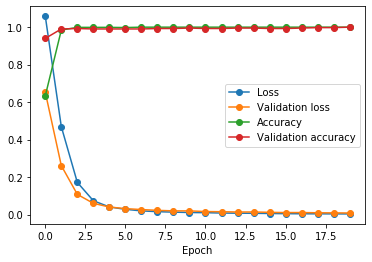

In [10]:
plt.plot(train_history.history['loss'], "-o", label="Loss")
plt.plot(train_history.history['val_loss'], "-o", label="Validation loss")
plt.plot(train_history.history['accuracy'], "-o", label="Accuracy")
plt.plot(train_history.history['val_accuracy'], "-o", label="Validation accuracy")
plt.xlabel("Epoch")
plt.legend()